In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['figure.figsize'] = (12, 6)

In [87]:
file_path = 'AirQualityUCI.csv'
data = pd.read_csv(file_path, delimiter=';', decimal=',', parse_dates=[[0, 1]], na_values=-200)

/var/folders/q7/ymsqyq497731b259tkmnf3q80000gn/T/ipykernel_12843/1233259252.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(file_path, delimiter=';', decimal=',', parse_dates=[[0, 1]], na_values=-200)
/var/folders/q7/ymsqyq497731b259tkmnf3q80000gn/T/ipykernel_12843/1233259252.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_path, delimiter=';', decimal=',', parse_dates=[[0, 1]], na_values=-200)


In [89]:
data.head()

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004 18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004 19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004 20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004 21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004 22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date_Time      9471 non-null   object 
 1   CO(GT)         7674 non-null   float64
 2   PT08.S1(CO)    8991 non-null   float64
 3   NMHC(GT)       914 non-null    float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
 14  Unnamed: 15    0 non-null      float64
 15  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(1)
memory usage: 1.2+ MB


In [93]:
# Drop unnecessary columns and handle missing values
data.drop(['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 
           'PT08.S4(NO2)', 'PT08.S5(O3)', 'Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)
data.dropna(inplace=True)

In [95]:
# Convert `Date_Time` column to datetime format
data['Date_Time'] = pd.to_datetime(data['Date_Time'], format='%d/%m/%Y %H.%M.%S')

# Set `Date_Time` as the index
data.set_index('Date_Time', inplace=True)

In [97]:
data.head(10)

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
Date_Time,,,,,,,,
2004-03-10 18:00:00,2.6,150.0,11.9,166.0,113.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,112.0,9.4,103.0,92.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,88.0,9.0,131.0,114.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,80.0,9.2,172.0,122.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,51.0,6.5,131.0,116.0,11.2,59.6,0.7888
2004-03-10 23:00:00,1.2,38.0,4.7,89.0,96.0,11.2,59.2,0.7848
2004-03-11 00:00:00,1.2,31.0,3.6,62.0,77.0,11.3,56.8,0.7603
2004-03-11 01:00:00,1.0,31.0,3.3,62.0,76.0,10.7,60.0,0.7702
2004-03-11 02:00:00,0.9,24.0,2.3,45.0,60.0,10.7,59.7,0.7648


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 827 entries, 2004-03-10 18:00:00 to 2004-05-01 00:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CO(GT)    827 non-null    float64
 1   NMHC(GT)  827 non-null    float64
 2   C6H6(GT)  827 non-null    float64
 3   NOx(GT)   827 non-null    float64
 4   NO2(GT)   827 non-null    float64
 5   T         827 non-null    float64
 6   RH        827 non-null    float64
 7   AH        827 non-null    float64
dtypes: float64(8)
memory usage: 58.1 KB


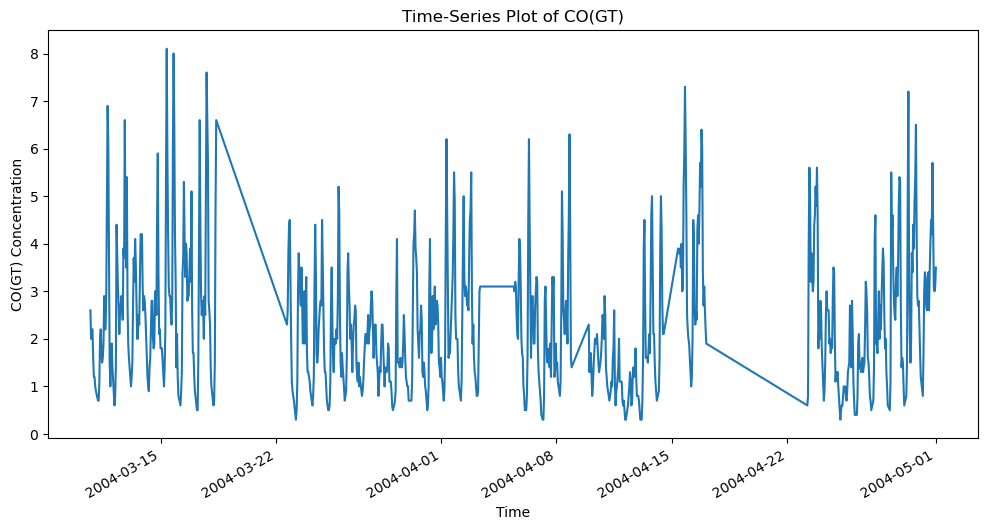

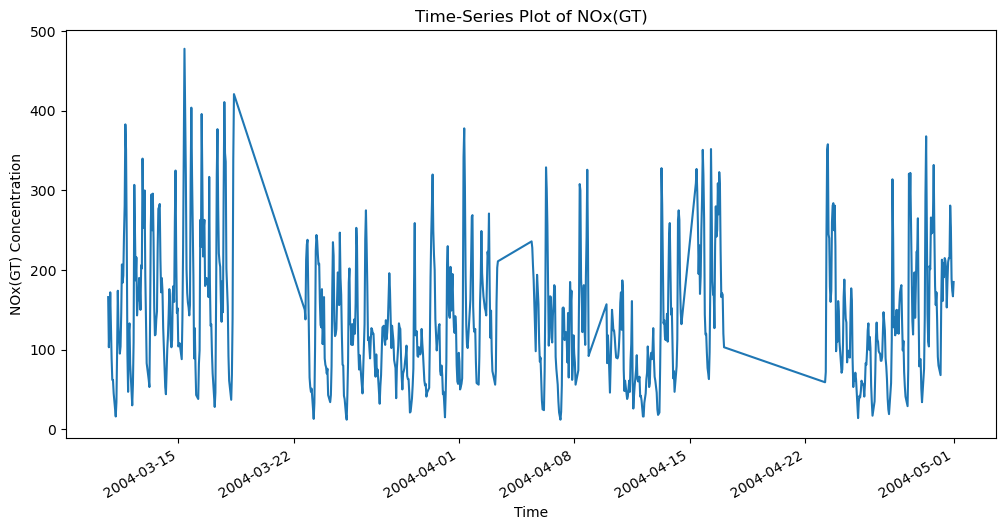

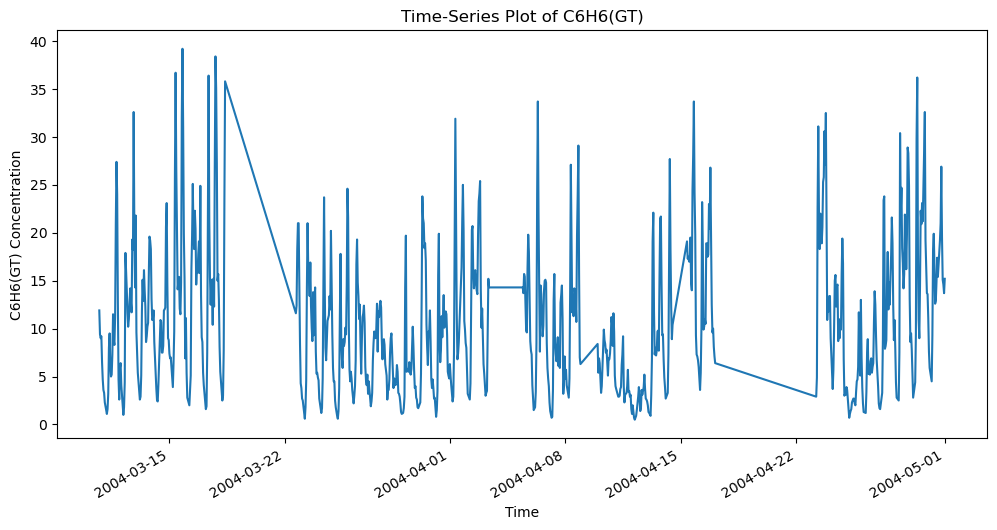

In [101]:
### 1. Time-Series Plots for Pollutants (CO, NOx, Benzene)
pollutants = ['CO(GT)', 'NOx(GT)', 'C6H6(GT)']
for pollutant in pollutants:
    plt.figure()
    data[pollutant].plot(title=f'Time-Series Plot of {pollutant}')
    plt.ylabel(f'{pollutant} Concentration')
    plt.xlabel('Time')
    plt.show()

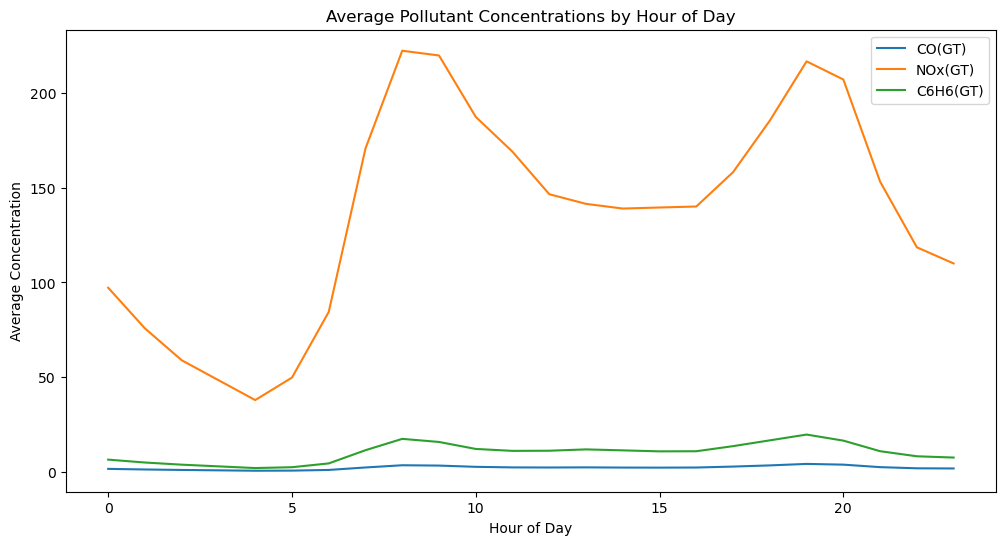

In [103]:
### 2. Daily and Weekly Patterns (Average by Hour of Day and Day of Week)
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek

# Average pollutant concentrations by hour of day
hourly_avg = data.groupby('hour')[pollutants].mean()
hourly_avg.plot(title='Average Pollutant Concentrations by Hour of Day')
plt.ylabel('Average Concentration')
plt.xlabel('Hour of Day')
plt.show()

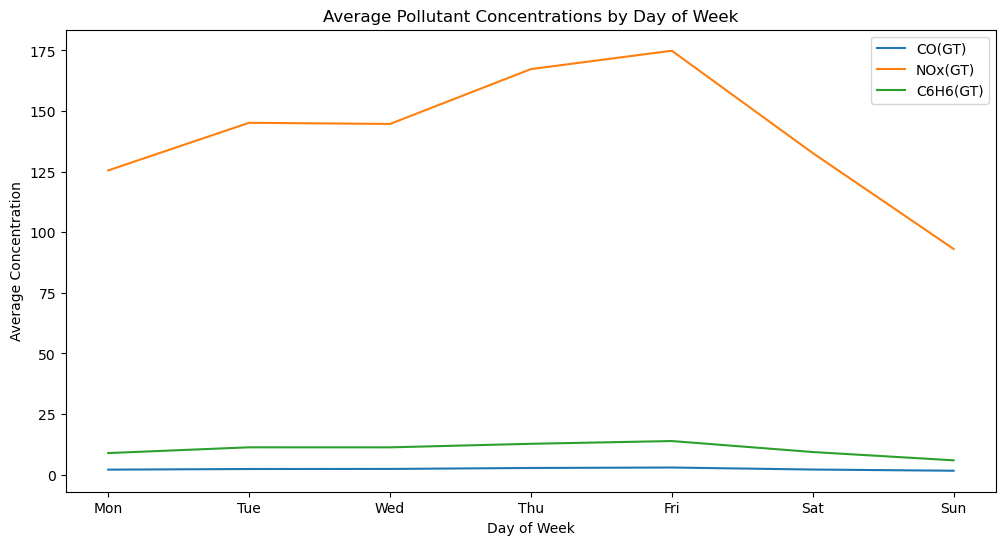

In [105]:
# Average pollutant concentrations by day of week
weekly_avg = data.groupby('day_of_week')[pollutants].mean()
weekly_avg.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekly_avg.plot(title='Average Pollutant Concentrations by Day of Week')
plt.ylabel('Average Concentration')
plt.xlabel('Day of Week')
plt.show()

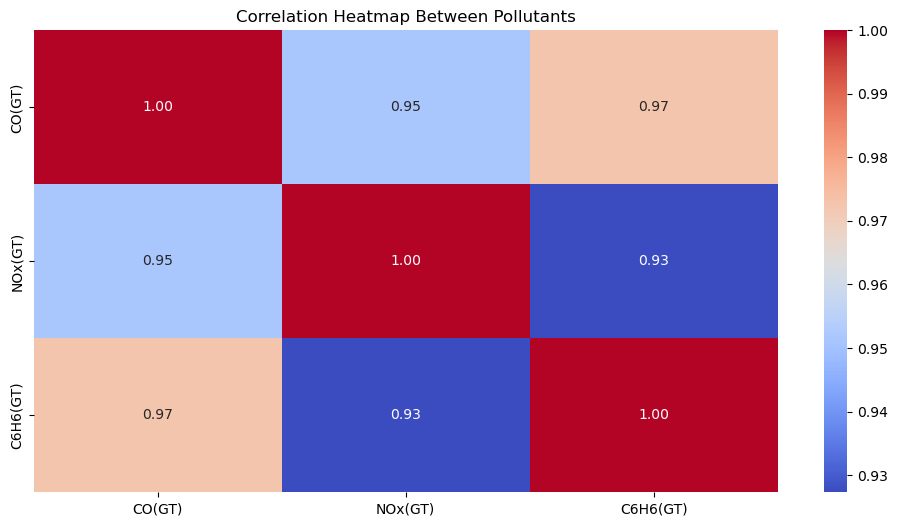

In [107]:
# Correlation heatmap between pollutants
correlation_matrix = data[pollutants].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Between Pollutants')
plt.show()

In [109]:
#Advanced Visualisation

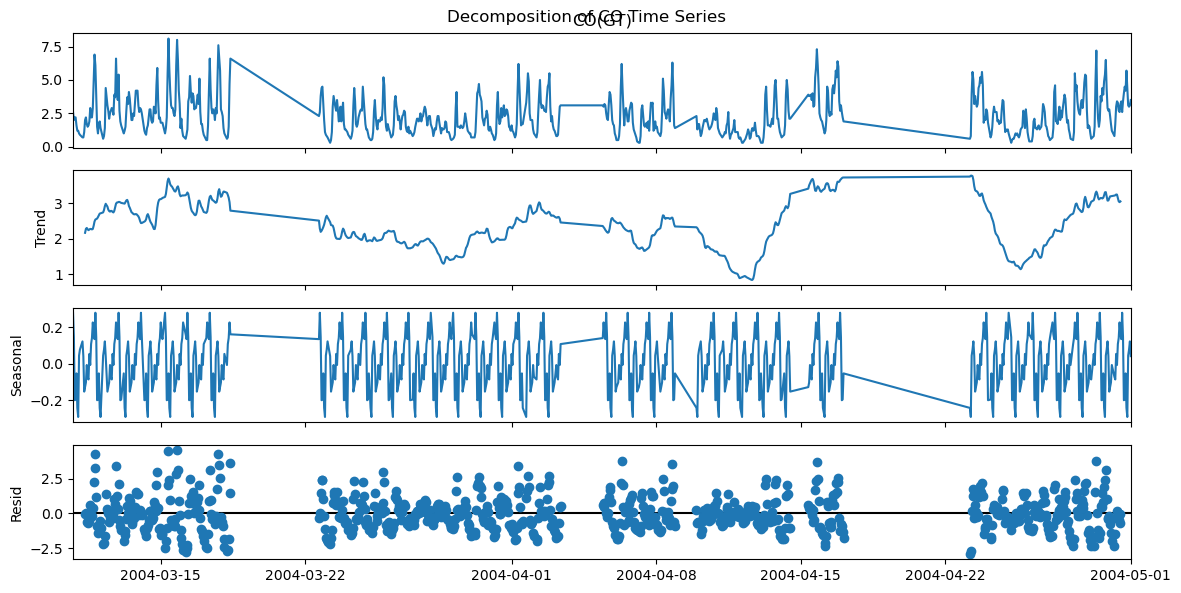

In [113]:
###2. Decomposition of Time Series (Trend, Seasonality, Residuals)
decomposition = seasonal_decompose(data['CO(GT)'], model='additive', period=24)
decomposition.plot()
plt.suptitle('Decomposition of CO Time Series')
plt.show()

In [117]:
result = data.isin(['-200']).any(axis=1)
print(data[result])

Empty DataFrame
Columns: [CO(GT), NMHC(GT), C6H6(GT), NOx(GT), NO2(GT), T, RH, AH, hour, day_of_week]
Index: []
